In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder



In [12]:
data= pd.read_csv("C:/Users/trinity/Downloads/arpithaphd/arpithaphd/aggregate_covid_country.csv")
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [14]:
print('The Data is available till :' , data['Date'].iloc[-1])

The Data is available till : 2020-05-26


In [15]:
data['Total Cases']= data[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [16]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


# Worldwide Covid 19 Insights

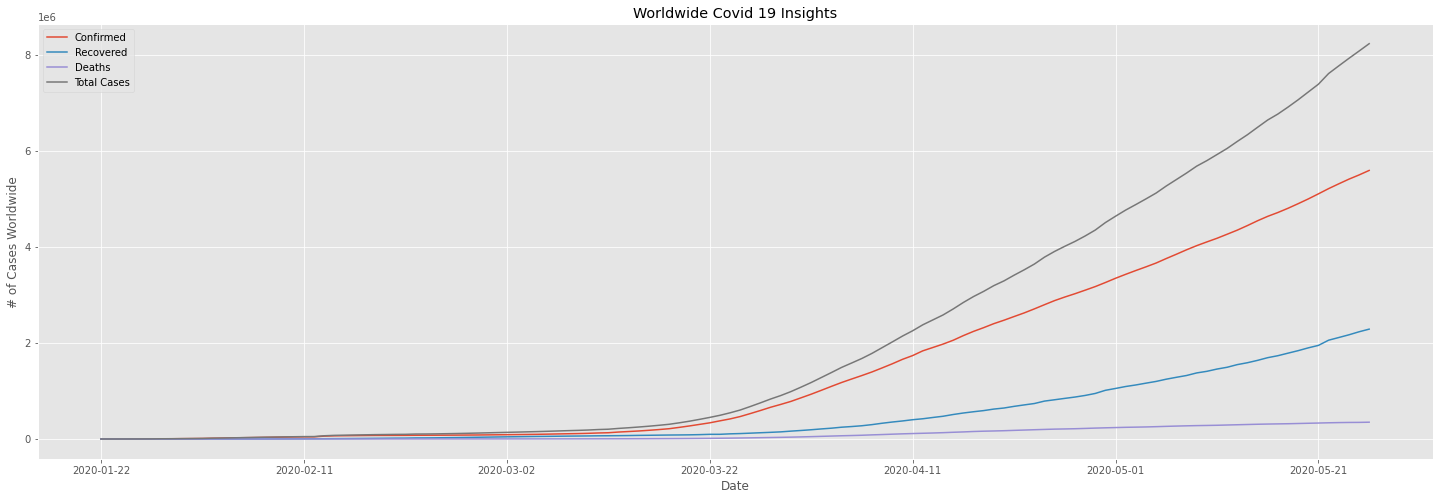

In [17]:
worldwide_covid19=data.groupby(['Date']).sum()
ax=worldwide_covid19.plot(figsize=(25,8))
ax.set_xlabel('Date')
ax.set_ylabel('# of Cases Worldwide')
ax.title.set_text('Worldwide Covid 19 Insights')
plt.show()

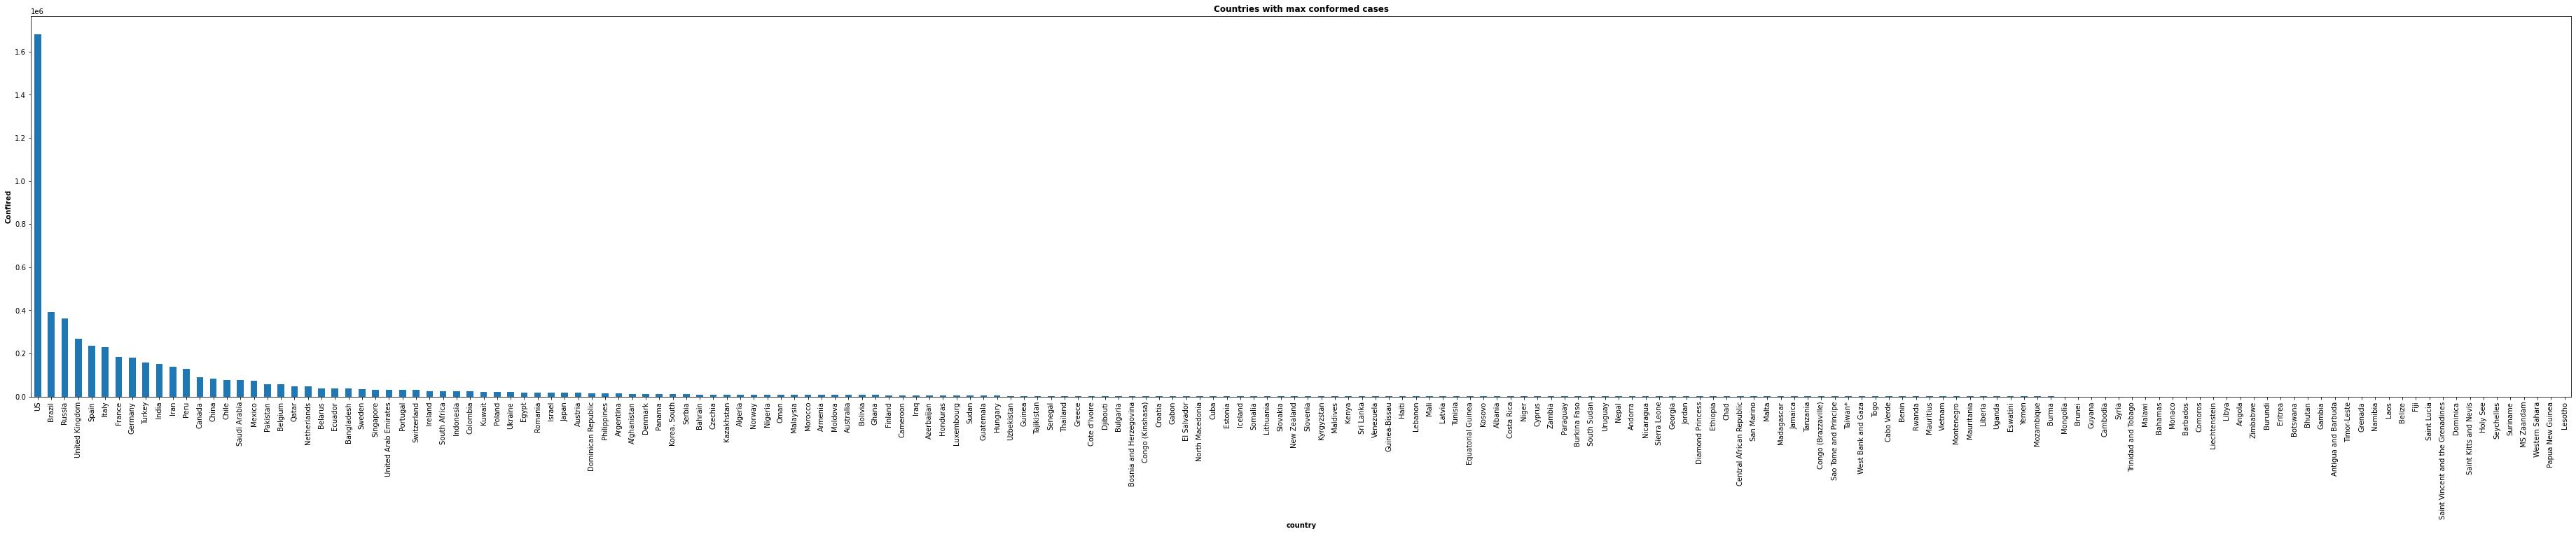

In [6]:
#countries with more conformed cases 
import matplotlib.pyplot as plt
plt.figure(figsize=(65,10))
data.groupby("Country")["Confirmed"].max().sort_values(ascending= False).plot.bar()
plt.xlabel("country", fontweight="bold")
plt.ylabel("Confired", fontweight="bold")
plt.title("Countries with max conformed cases", fontweight="bold")
plt.show()

US has highest conformed cases
next comes brazil,india, russia, south africa and so on


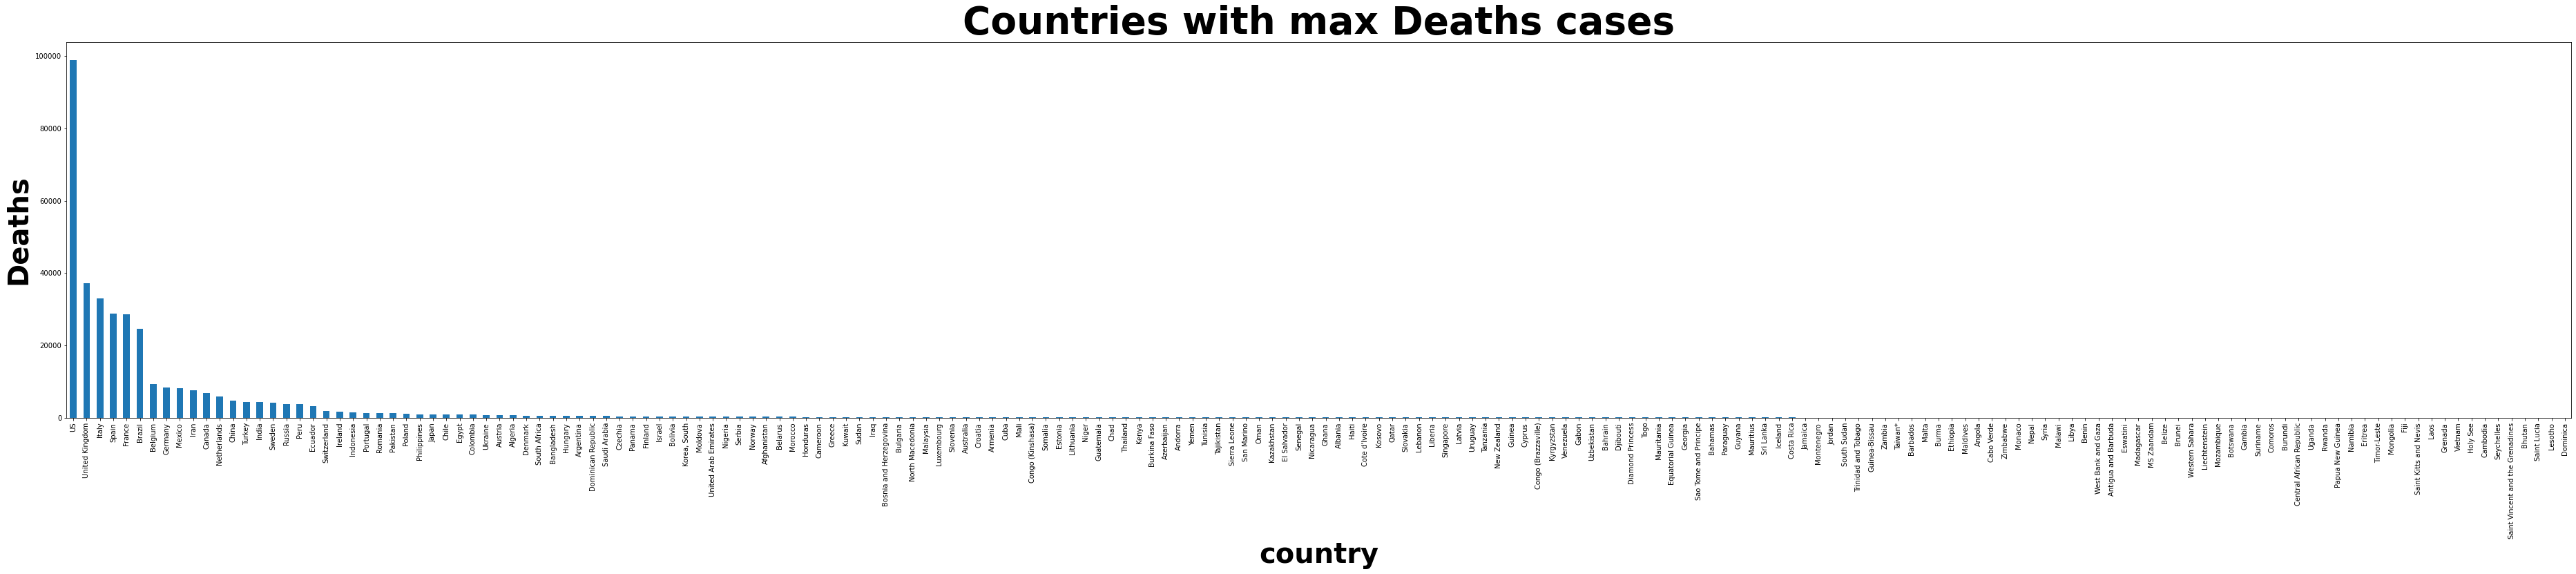

In [7]:
#countries with more deaths cases 
import matplotlib.pyplot as plt
plt.figure(figsize=(65,10))
data.groupby("Country")["Deaths"].max().sort_values(ascending= False).plot.bar()
plt.xlabel("country", fontweight="bold", size=40)
plt.ylabel("Deaths", fontweight="bold", size=40)
plt.title("Countries with max Deaths cases", fontweight="bold", size= 55)
plt.show()

US has highest deaths


brazil, united kingdom,mexico, italy countries follow

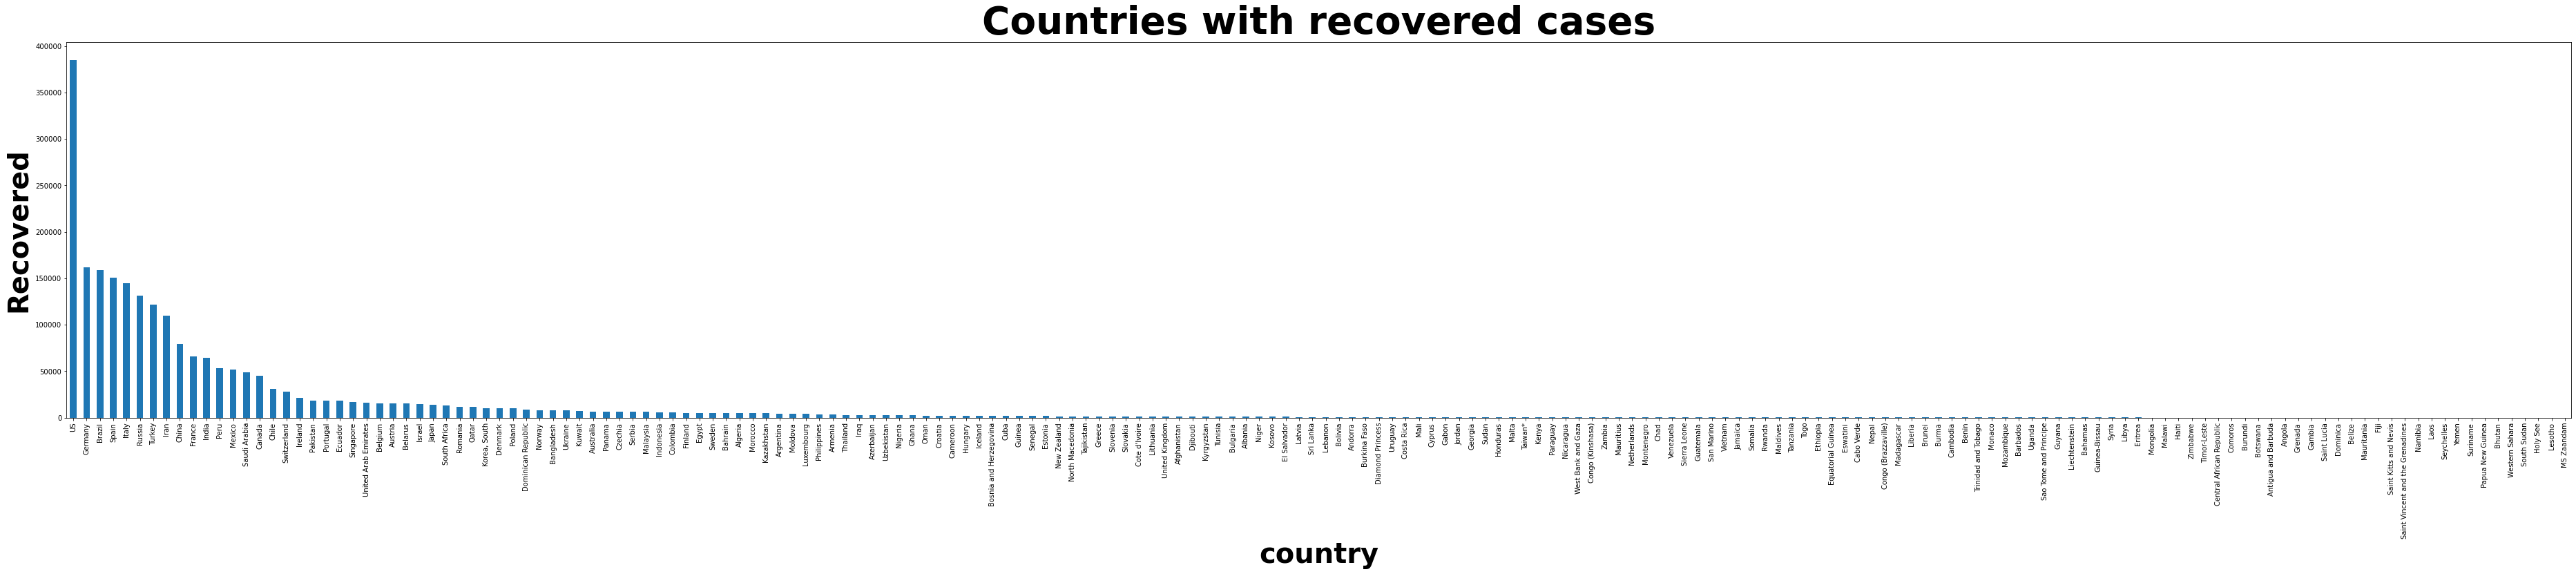

In [8]:
#countries which have more recovered cases
plt.figure(figsize=(65,10))
data.groupby("Country")["Recovered"].max().sort_values(ascending= False).plot.bar()
plt.xlabel("country", fontweight="bold", size=40)
plt.ylabel("Recovered", fontweight="bold", size=40)
plt.title("Countries with recovered cases", fontweight="bold", size= 55)
plt.show()


Brazil has highest recovary cases

Us,India, Russia follows

Us is the country where the cases are growing very rapidly

# Covid 19 Cases in India, US, Brazil, Russia, South Africa


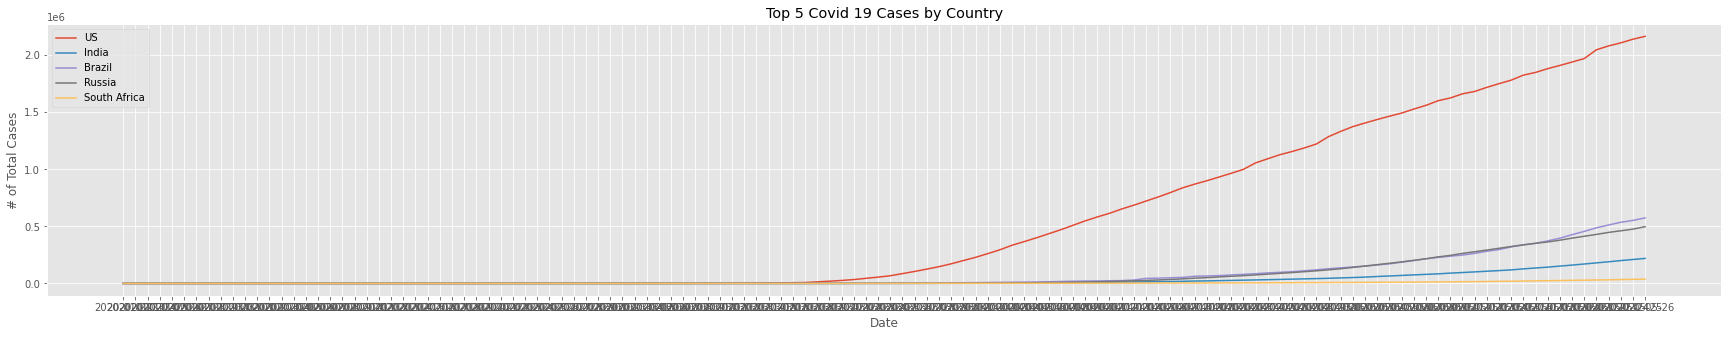

In [21]:
India_covid19=data[data['Country']== 'India'].groupby(['Date']).sum()
US_covid19=data[data['Country']== 'US'].groupby(['Date']).sum()
Brazil_covid19=data[data['Country']== 'Brazil'].groupby(['Date']).sum()
Russia_covid19=data[data['Country']== 'Russia'].groupby(['Date']).sum()
SA_covid19=data[data['Country']== 'South Africa'].groupby(['Date']).sum()
fig=plt.figure(figsize=(30,5))
ax=fig.add_subplot(111)
ax.plot(US_covid19[['Total Cases']],label='US',)
ax.plot(India_covid19[['Total Cases']],label='India')
ax.plot(Brazil_covid19[['Total Cases']],label='Brazil')
ax.plot(Russia_covid19[['Total Cases']],label='Russia')
ax.plot(SA_covid19[['Total Cases']],label='South Africa')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Top 5 Covid 19 Cases by Country')
plt.legend(loc='upper left')

plt.show()

In [41]:
X=data.drop(columns=["Deaths","Date"],axis=1)
y=data["Deaths"]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:

le= LabelEncoder()
data["Country"] = le.fit_transform(data["Country"])
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,2,0,0,0,0
3,0,3,0,0,0,0
4,0,4,0,0,0,0


In [43]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor() 
regressor.fit(X, y)

DecisionTreeRegressor()

In [45]:
regressor.score(X_train,y_train)

-0.01749188284812231

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
print("Test Accuracy" ,regressor.score(X_test,y_test))
print("Train Accuracy",regressor.score(X_train,y_train))

Test Accuracy 1.0
Train Accuracy 1.0


In [48]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X, y) 

RandomForestRegressor(random_state=0)

In [49]:
print("Test Accuracy" ,regressor.score(X_test,y_test))
print("Train Accuracy",regressor.score(X_train,y_train))

Test Accuracy -0.017209180669692348
Train Accuracy -0.017479134014717346
